(4096, 4096)


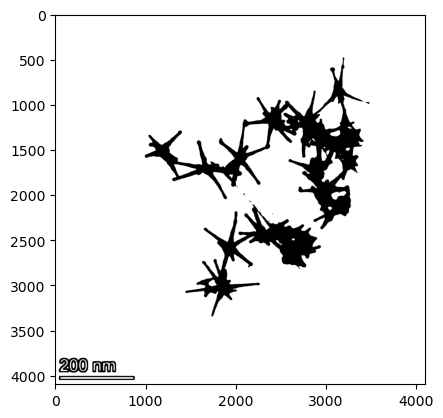

In [55]:
import skimage as ski
import numpy as np
from skimage.util import invert
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.morphology import skeletonize, thin

filename = 'hard.png'
image = ski.io.imread(filename)
image = rgb2gray(image)
for i in range(50):
     = ski.filters.gaussian()
""" further enhancement an be made with opening and closing the 
background can be worked out suing selective backgrounds (source youtube Nicolai)"""
copied = .copy()
print(np.shape(copied))
for r in range(4096):
    for i in range(4096):
        a = round([r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
plt.imshow(copied, cmap = 'gray')

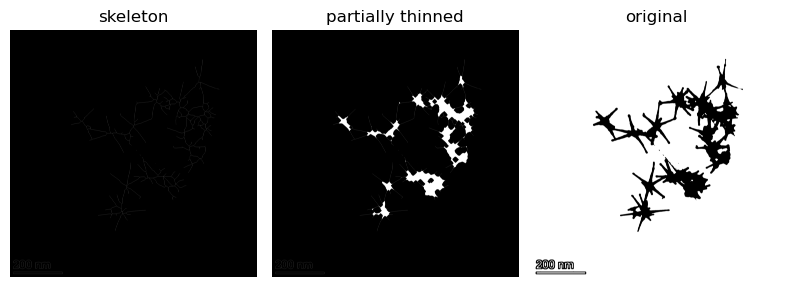

In [56]:
from skimage.morphology import skeletonize, thin

 = invert(copied)
skeleton = skeletonize()
''' can be enhanced by opening and closing to get rid of small curves
  the centres can be found by open function only on the core (core is colored differently)'''
thinned_partial = thin(, max_num_iter=30)

fig, axes = plt.subplots(1,3, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray)
ax[0].set_title('skeleton')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

ax[2].imshow(invert(), cmap=plt.cm.gray)
ax[2].set_title('original')
ax[2].axis('off')


fig.tight_layout()
plt.show()

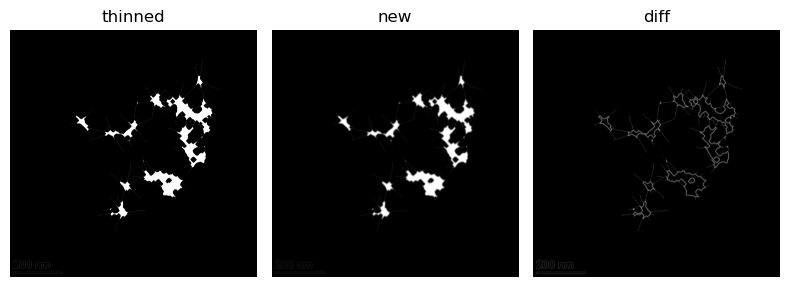

In [18]:
'''
area closing tried but did not give the desired results

'''
# new = thinned_partial
# for i in range(60):
#     new = ski.filters.gaussian(new)
# new_copy = new.copy()
# for r in range(4096):
#     for i in range(4096):
#         a = round(new[r][i],2)
#         if a > 0.6:
#             new_copy[r][i]= 1
#         else:
#             new_copy[r][i] = 0
# new = ski.morphology.area_closing(new, area_threshold = 16, connectivity = 0)
# fig, axes = plt.subplots(1,3, figsize=(8, 8), sharex=True, sharey=True)
# diff = compare_images(thinned_partial, new, method='diff')
# ax = axes.ravel()

# ax[0].imshow(thinned_partial, cmap=plt.cm.gray)
# ax[0].set_title('thinned')
# ax[0].axis('off')

# ax[1].imshow(new, cmap=plt.cm.gray)
# ax[1].set_title('new')
# ax[1].axis('off')

# ax[2].imshow(diff, cmap=plt.cm.gray)
# ax[2].set_title('diff')
# ax[2].axis('off')

# fig.tight_layout()
# plt.show()


In [43]:
import cv2
image = thinned_partial.copy()

In [57]:
'''
contouring and masking - whatever it means - has been implemented and unsuccessful

'''
# image = cv2.cvtColor(, cv2.COLOR_GRAY2RGB)
# image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# __, thresh = cv2.threshold(image, np.mean(image), 255, cv2.THRESH_BINARY_INV)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# cnt= sorted(contours, key = cv2.contourArea)[-1]
# mask = np.zeros((4096,4096), dtype = 'uint8')
# maskedRed = cv2.drawContours(mask, [cnt], -1,(0,0,255),-1)
# maskedFinal = cv2.drawContours(mask, [cnt], -1,(255,255,255),-1)
# finalImage = cv2.bitwise_and(image,image, mask= maskedFinal)

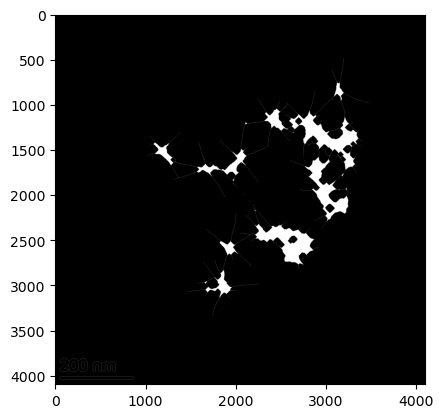

In [93]:
plt.imshow(finalImage, cmap = 'gray')

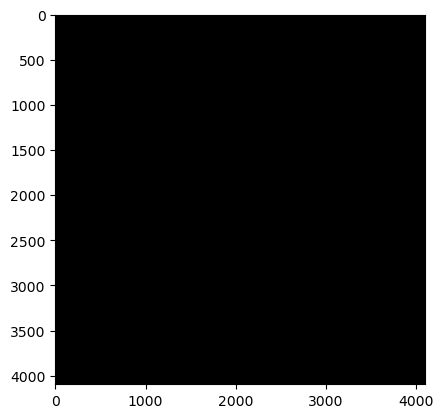

In [59]:
plt.imshow(maskedFinal, cmap = 'gray')

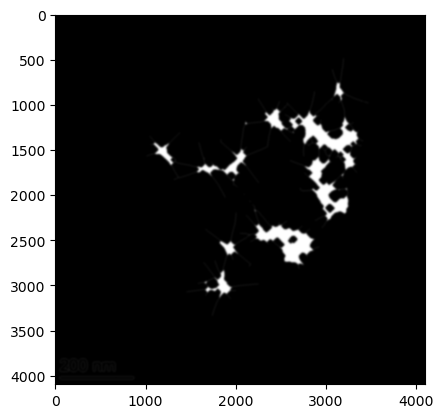

In [84]:
'''
eroding

'''
 = thinned_partial.copy()
 = .astype(np.float32)
for i in range(100):
     = ski.filters.gaussian()
plt.imshow(,cmap = 'gray')

(4096, 4096)


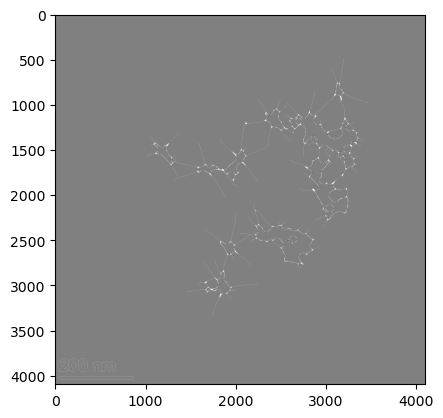

In [85]:
copied = .copy()
print(np.shape(copied))
for r in range(4096):
    for i in range(4096):
        a = round([r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
plt.imshow(copied, cmap = 'gray')
plt.imshow(thinned_partial - copied, 'gray')

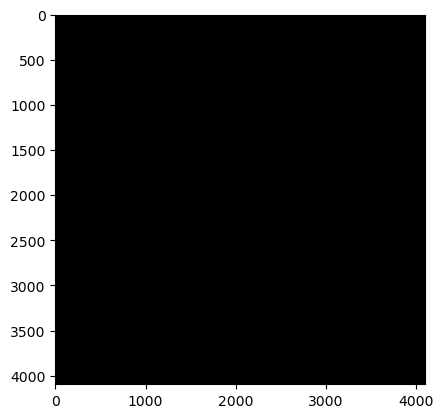

In [92]:
if .ndim == 2:
     = cv2.cvtColor(, cv2.COLOR_GRAY2BGR)
elif .shape[2] != 3:
     = cv2.cvtColor(, cv2.COLOR_RGBA2BGR)  # Assuming it's RGBA, adjust if needed

# Ensure the input  is of type CV_8UC3
 = .astype(np.uint8)

# Now you can use the  with cv2.fastNlMeansDenoisingColored()
dst = cv2.fastNlMeansDenoisingColored(, None, 1, 1, 1, 1)
plt.imshow(,'gray')

In [95]:
thinned_partial = thinned_partial.astype(np.uint8)
finalImage = cv2.bitwise_and(copied,copied, mask= invert(thinned_partial))

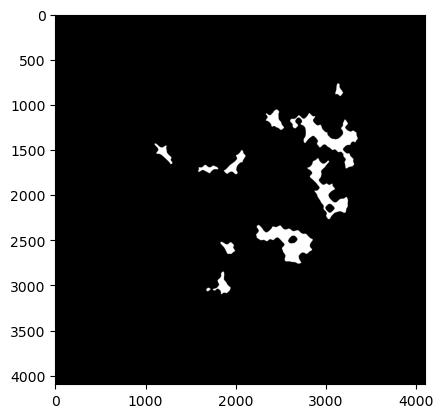

In [97]:
plt.imshow(finalImage, 'gray')

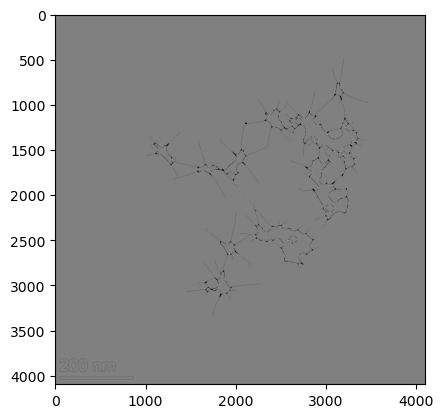

In [99]:
plt.imshow(finalImage - thinned_partial, 'gray')

In [102]:
 = thinned_partial
scaled_image = ( + np.min()) / (np.max() + np.min()) * 255
image_uint8 = scaled_image.astype(np.uint8)
ski.io.imsave('outputh.png', image_uint8)

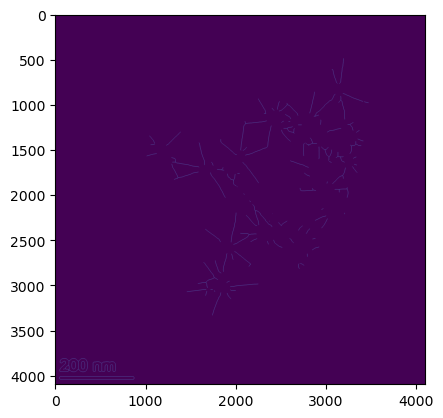

In [104]:
lines = skeleton.copy()
'''
here parallel computation will be more efficient

'''
for r in range(4096):
    for i in range(4096):
        a = skeleton[r][i] - finalImage[r][i]
        if a > 0:
            lines[r][i]= 1
        else:
            lines[r][i] = 0

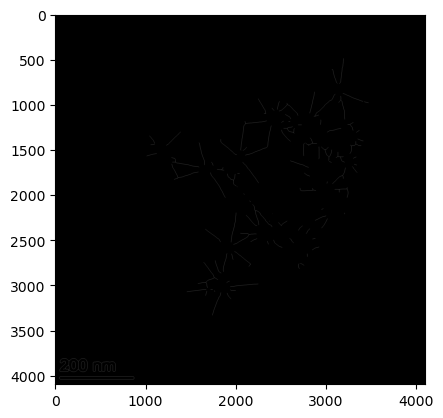

In [105]:
plt.imshow(lines,'gray')

In [106]:
 = lines
scaled_image = ( + np.min()) / (np.max() + np.min()) * 255
image_uint8 = scaled_image.astype(np.uint8)
ski.io.imsave('outputh.png', image_uint8)

C:\Users\user\AppData\Local\Temp\ipykernel_10456\3273136160.py:4: UserWarning: outputh.png is a low contrast image
  ski.io.imsave('outputh.png', image_uint8)
